### The Spark Foundation - GRIP Task #2

- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

Dataset : https://bit.ly/3kXTdox (iris data set)

In [136]:
import pandas as pd      #importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import silhouette_score

In [7]:
iris = load_iris()

In [21]:
df_X = pd.DataFrame(iris.data,columns=iris.feature_names)
df_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
X = df_X.iloc[:, [0, 1, 2, 3]].values

Determination of the optimum number of clusters

In [76]:
cluster_range = range(1,10)
cluster_errors = []
for num in cluster_range:
    clusters = KMeans(num, n_init=10)
    clusters.fit(X)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num':cluster_range,'Cluster_errors':cluster_errors})

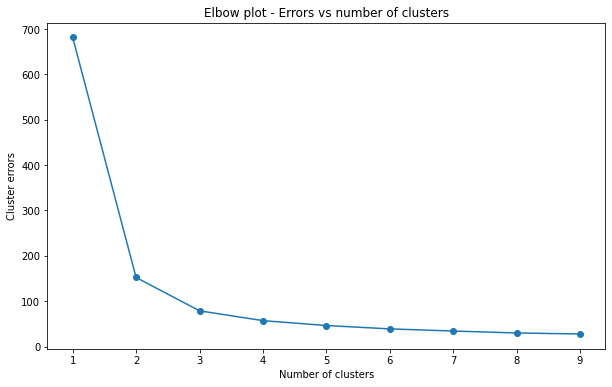

In [78]:
plt.figure(figsize=(10,6))
plt.plot(clusters_df.num,clusters_df.Cluster_errors,'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster errors')
plt.title('Elbow plot - Errors vs number of clusters')
plt.show()

From the above elbow plot, we can infer that the optimum number of clusters is 3 as the bent is at 3 clusters and the information loss due to cluster errors is minimised to a significant level.

#### KMeans clustering model

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [114]:
X_scaled = scaler.fit_transform(df_X)

In [118]:
kmeans_model = KMeans(n_clusters = 3)  #model with 3 clusters
kmeans_model.fit(X_scaled)

KMeans(n_clusters=3)

In [125]:
kmeans_model1 = KMeans(n_clusters = 3)  #model with 3 clusters
kmeans_model1.fit(X)

KMeans(n_clusters=3)

In [126]:
centroids = kmeans_model1.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(df_X))  #dataframe of centroids as per cluster assigned
centroid_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


In [120]:
target = kmeans_model.fit_predict(X)   

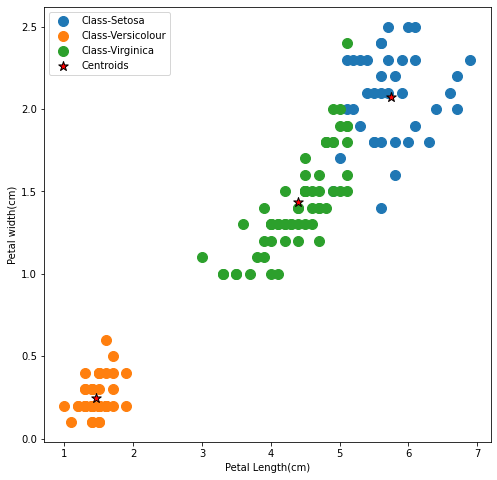

In [127]:
plt.figure(figsize=(8,8))
plt.scatter(X[target == 0, 2], X[target == 0, 3], s = 100,  label = 'Class-Setosa')
plt.scatter(X[target == 1, 2], X[target == 1, 3], s = 100, label = 'Class-Versicolour')
plt.scatter(X[target == 2, 2], X[target == 2, 3],s = 100, label = 'Class-Virginica')

plt.scatter(centroids[:, 2], centroids[:,3], s = 100, c = 'red', label = 'Centroids',marker='*', edgecolors='black')
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal width(cm)')
plt.legend()
plt.show()

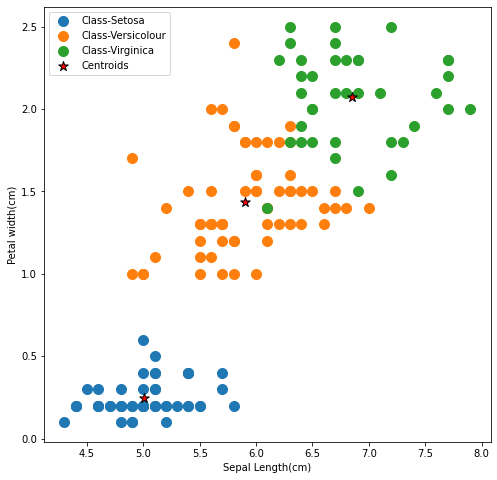

In [112]:
plt.figure(figsize=(8,8))
plt.scatter(X[target == 0, 0], X[target == 0, 3], s = 100,  label = 'Class-Setosa')
plt.scatter(X[target == 1, 0], X[target == 1, 3], s = 100, label = 'Class-Versicolour')
plt.scatter(X[target == 2, 0], X[target == 2, 3],s = 100, label = 'Class-Virginica')

plt.scatter(centroids[:, 0], centroids[:,3], s = 100, c = 'red', label = 'Centroids',marker='*', edgecolors='black')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Petal width(cm)')
plt.legend()
plt.show()

In [134]:
target_df = pd.DataFrame(target,columns =['Labels'])

In [135]:
target_df.value_counts()

Labels
2         62
1         50
0         38
dtype: int64

For the above value counts of the clusters we can see that the clustering is almost similar to the true labels i.e. (50,50,50) for all the three classes of flowers

In [137]:
silhouette_score(X,target)

0.5528190123564091

The silhouette score shows the overlapping tendency of the clusters or how well separated the clusters are from each other. A score of 0.55 shows there is some overlapping present but given the positive value we can conclude that the clusters are well formed.

In [104]:
#new values for predictions
X1 = ([[6.1, 3.5, 1.4, 0.5],
       [4.3, 3.7 , 1.0, 0.2],
       [3.7, 3.2, 1.3, 0.9],
       [2.6, 3.5, 1.5, 0.3]])

In [106]:
target_new = kmeans_model.fit_predict(X1)  
iris.target_names[target_new]

array(['virginica', 'versicolor', 'versicolor', 'setosa'], dtype='<U10')